In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# all TOIs as of 13th October 2021 - updated list can be downlaoded from https://exofop.ipac.caltech.edu/tess/view_toi.php
tois = pd.read_csv('./TOI_list.csv', comment = '#')

# the PHT tess candidate list 
ctois = pd.read_csv('./PHT_candidates_info.csv')


In [3]:
# planet candidates uploaded to exofop by the PHT team
candidates_pht = ctois[np.isfinite(ctois['depth_PHT']) == True]

# planet candidates identified by the PHT but also uplaoded by another team
candidates_others = ctois[np.isfinite(ctois['depth_PHT']) != True]


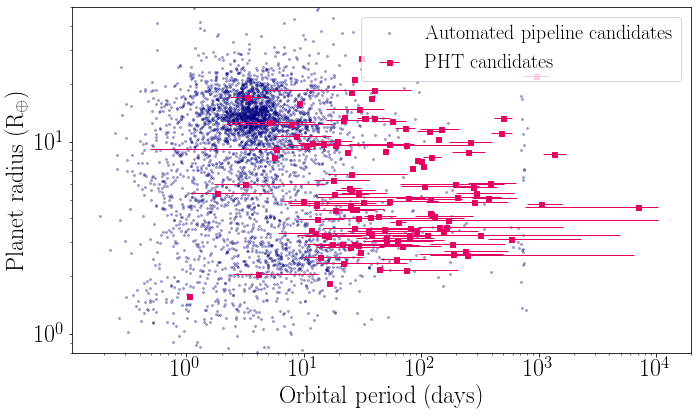

In [15]:
from matplotlib import rc
from astroquery.mast import Catalogs
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter

# format the plot
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['xtick.labelsize']=23
plt.rcParams['ytick.labelsize']=23

# set up figure 
fig, ax = plt.subplots(figsize=(10,6))

# plot the TOIs in blue
plt.plot(tois['Orbital Period Value'], tois['Planet Radius Value'] ,ms = 2, linewidth = 0, marker = 'o', color = 'navy', alpha = 0.3, label = 'Automated pipeline candidates', zorder = -2)

# plot the planet hunters identified candidates in magenta
plt.errorbar(candidates_pht['period_PHT'], candidates_pht['planet_radius'], xerr = np.array([candidates_pht['period err neg'], candidates_pht['period err pos']]), lw = 0, ms = 5, marker = 's', mec = '#e60063', color = '#e60063', alpha = 1, zorder = 1, elinewidth = 1, ecolor = '#e60063', label = 'PHT candidates')
plt.errorbar(candidates_others['Period (days)'], candidates_others['Radius (R_Earth)'], xerr = np.array([candidates_others['Period (days) Error'], candidates_others['Period (days) Error']]), lw = 0, ms = 5, marker = 's', mec = '#e60063', color = '#e60063', alpha = 1, zorder = 1, elinewidth = 1, ecolor = '#e60063')

# set up the figure 
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel(r"${\rm Planet~radius~(R_{\oplus})}$", fontsize = 24)
plt.xlabel("Orbital period (days)", fontsize = 24)

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)

plt.legend(fontsize=20, loc=1)
plt.ylim(0.8,50)
plt.xlim(0,2e4)
plt.subplots_adjust(hspace = 0, top=0.98, right = 0.98, bottom = 0.18, left = 0.12) 

#plt.savefig("./PHT_candidate_period_radius_plot.png", dpi = 300)

**Figure 1.** The PHT planet candidates (magenta squares) compared to the automated pipeline found candidates (blue dots), highlighting the different region of parameter space filled in by the two different search methods. Values of the orbital periods and planet radii were obtained via transit modelling using the open source software *pyaneti* (Barragan et al [2021](https://arxiv.org/abs/2109.14086), [GitHub](https://github.com/oscaribv/pyaneti))
The orbital period of single transit events are poorly constrained, which is reflected by the large errorbars.

In [5]:
# ---- plot the properties of the host stars using MIST stellar evolution tracks ----

In [6]:
import warnings
from glob import glob
warnings.filterwarnings('ignore')

# import the MIST stellar evolution tracks
ee_files = sorted(glob('./MIST_eep/*'))


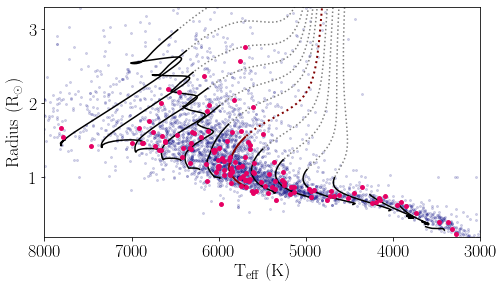

In [8]:
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

fig, ax = plt.subplots(figsize=(7,4))

# import the MIST stellar evolution tracks
phase0 = pd.read_csv('./MIST_eep/eep_phase0.csv') # these are the main-sequence tracks
phase2 = pd.read_csv('./MIST_eep/eep_phase2.csv') # these are the post main-sequence tracks


for i in range(300,1700, 100): # we have evolutionary tracks from 0.3 M_sun to 1.6 M_sun in steps of 0.1
    colname_phase0_T = (str(i).rjust(6, "0")) + '0M_phase0_T'
    colname_phase0_R = (str(i).rjust(6, "0")) + '0M_phase0_R'

    colname_phase2_T = (str(i).rjust(6, "0")) + '0M_phase2_T'
    colname_phase2_R = (str(i).rjust(6, "0")) + '0M_phase2_R'

    phase0_T = phase0[colname_phase0_T]
    phase0_R = phase0[colname_phase0_R]

    phase2_T = phase2[colname_phase2_T]
    phase2_R = phase2[colname_phase2_R]

    # the -99 values are just there as padding to make the lists the same length -- we dont' need them to mask out.
    mask0 = (phase0_T != -99) & (phase0_R != -99)
    mask2 = (phase2_T != -99) & (phase2_R != -99)

    # plot the 1 Solar Mass track in a different colour to make it stand out - easier for reference.
    if i == 1000:
        plt.plot(phase0_T[mask0], phase0_R[mask0], 'maroon', zorder = -1, lw = 2)
        plt.plot(phase2_T[mask2],phase2_R[mask2], 'maroon', linestyle = ':', zorder = -1, lw = 2)
    else:
        plt.plot(phase0_T[mask0], phase0_R[mask0], 'k', zorder = -1)
        plt.plot(phase2_T[mask2],phase2_R[mask2], 'grey', linestyle = ':', zorder = -1)


# plot the PHT candidates in magenta
plt.scatter(ctois['Stellar Eff Temp (K)'], ctois['Stellar Radius (R_Sun)'], c= '#e60063', s = 15, zorder = 1)

# plto the TOIs in navy
plt.scatter(tois['Effective Temperature Value'], tois['Star Radius Value'], zorder = -2, c = 'navy', alpha = 0.15, s = 4)

plt.xlim(plt.xlim()[::-1])
plt.ylim(0.2,3.3)
plt.xlabel(r"${\rm T_{eff}~(K)}$", fontsize = 18)
plt.ylabel(r"${\rm Radius~(R_{\odot})}$", fontsize = 18)
plt.xlim(8000,3000)

plt.subplots_adjust(hspace = 0, top=0.98, right = 0.965, bottom = 0.18, left = 0.1) 

#plt.savefig("./PHT_eep.png", dpi = 300)

plt.show()

**Figure 2.** Stellar evolution tracks showing main sequence (solid black lines) and post-main sequence (dashed grey lines) MIST stellar evolution for stellar masses ranging from 0.3 to 1.6 solar mass in steps of 0.1 solar mass. The magenta evololution track shows corresponds to 1 Solar mass. The navy dots show the TOIs and the magenta circles show the PHT candidates. This figure highlights that PHT is able to find planet candidates around stars with a wide range of properties as well as at different stages of their evololution. 